## Loading libraries and dataset

In [504]:
import numpy as np
import pandas as pd
import os
import glob
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
## spark is not installed on local

In [505]:
def fetch_dataset(folder):
    
    #fething all files in folder
    path = os.getcwd()
    csv_files = glob.glob(os.path.join(path, folder+"/*.txt"))
    
    #necessary modification into files
    for f in csv_files:
        reading_file = open(f, "r")
        is_first=True
        new_file_content = ""
        for line in reading_file:
            stripped_line = line.strip()
            new_line = stripped_line.replace("Weather conditions", "Weather_conditions").replace("Time_taken (min)", "Time_taken(min)")
            new_file_content += new_line +"\n"
        reading_file.close()

        writing_file = open(f, "w")
        writing_file.write(new_file_content)
        writing_file.close()
        
        #merging into main dataframe
        try:
            df=pd.read_csv(f,skipfooter=1,delim_whitespace=True,engine='python')
            df_final[df.columns[1]]=df[df.columns[1]]
        except:
            df_final=pd.read_csv(f,skipfooter=1,delim_whitespace=True,engine='python')
                
    #structuring main dataframe        
    df_final=df_final.transpose().reset_index()
    df_final.columns=df_final.iloc[0]
    df_final.drop(0,inplace=True)
    df_final.reset_index(drop=True)

    return df_final


In [506]:
df_train_main = fetch_dataset('C:/Users/dhananjaygupta/Downloads/16cbaf00248311ed/dataset/train')
df_test_main = fetch_dataset('C:/Users/dhananjaygupta/Downloads/16cbaf00248311ed/dataset/test')

In [507]:
df_train= df_train_main.copy()
df_test = df_test_main.copy()

## EDA and feature enginering

In [508]:
df_train

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
1,0x4607,INDORES13DEL02,37.000000,4.900000,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,Sunny,High,2,Snack,motorcycle,0.000000,No,Urban,24.000000
2,0xb379,BANGRES18DEL02,34.000000,4.500000,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,Stormy,Jam,2,Snack,scooter,1.000000,No,Metropolitian,33.000000
3,0x5d6d,BANGRES19DEL01,23.000000,4.400000,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30,8:45,Sandstorms,Low,0,Drinks,motorcycle,1.000000,No,Urban,26.000000
4,0x7a6a,COIMBRES13DEL02,38.000000,4.700000,11.003669,76.976494,11.053669,77.026494,05-04-2022,17:60,18:10,Sunny,Medium,0,Buffet,motorcycle,1.000000,No,Metropolitian,21.000000
5,0x70a2,CHENRES12DEL01,32.000000,4.600000,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30,13:45,Cloudy,High,1,Snack,scooter,1.000000,No,Metropolitian,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45589,0x7c09,JAPRES04DEL01,30.000000,4.800000,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.000000,No,Metropolitian,32.000000
45590,0xd641,AGRRES16DEL01,21.00,4.60,0.00,0.00,0.07,0.07,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.00,No,Metropolitian,36.00
45591,0x4f8d,CHENRES08DEL03,30.000000,4.900000,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05,Cloudy,Low,1,Drinks,scooter,0.000000,No,Metropolitian,16.000000
45592,0x5eee,COIMBRES11DEL01,20.000000,4.700000,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.000000,No,Metropolitian,26.000000


In [509]:
df_train.describe()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
count,45593,45593,43739,43685,45593,45593,45593,45593,45593,43862,45593,44977,44992,45593,45593,45593,44600,45365,44393,45593
unique,45593,1320,64,71,659,520,4373,4373,44,176,193,6,4,4,4,4,12,2,3,132
top,0x4607,PUNERES01DEL01,35.000000,4.800000,0.00,0.00,0.13,0.13,15-03-2022,21:55,21:30,Fog,Low,2,Snack,motorcycle,1.000000,No,Metropolitian,26.000000
freq,1,67,2077,6488,3595,3631,341,341,1192,461,496,7654,15477,15034,11533,26435,25599,44469,34093,1928


In [510]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45593 entries, 1 to 45593
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           45593 non-null  object
 1   Delivery_person_ID           45593 non-null  object
 2   Delivery_person_Age          43739 non-null  object
 3   Delivery_person_Ratings      43685 non-null  object
 4   Restaurant_latitude          45593 non-null  object
 5   Restaurant_longitude         45593 non-null  object
 6   Delivery_location_latitude   45593 non-null  object
 7   Delivery_location_longitude  45593 non-null  object
 8   Order_Date                   45593 non-null  object
 9   Time_Orderd                  43862 non-null  object
 10  Time_Order_picked            45593 non-null  object
 11  Weather_conditions           44977 non-null  object
 12  Road_traffic_density         44992 non-null  object
 13  Vehicle_condition            45

In [511]:
x=df_train.isna().sum()
x

0
ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

<AxesSubplot:ylabel='0'>

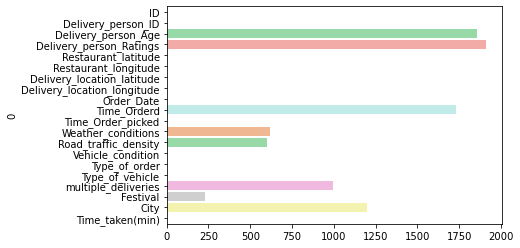

In [512]:
sns.barplot(x=x,y=x.index,palette='pastel')

In [513]:
df_train.Delivery_person_ID.nunique()

1320

In [514]:
df_test.Delivery_person_ID.nunique()

1297

In [515]:
df_train[df_train['Delivery_person_ID']=='CHENRES08DEL03']

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
398,0x4632,CHENRES08DEL03,37.000000,4.600000,13.022394,80.242439,13.112394,80.332439,10-03-2022,17:45,17:50,Stormy,Medium,1,Buffet,motorcycle,1.000000,No,Urban,26.000000
956,0x4b4e,CHENRES08DEL03,31.000000,4.900000,13.022394,80.242439,13.052394,80.272439,03-04-2022,20:55,20:60,Windy,Jam,2,Buffet,electric_scooter,1.000000,No,Metropolitian,30.000000
2720,0xa0dd,CHENRES08DEL03,31.000000,4.500000,13.022394,80.242439,13.082394,80.302439,24-03-2022,22:10,22:15,Sandstorms,Low,1,Drinks,motorcycle,1.000000,No,Metropolitian,28.000000
3111,0x1de9,CHENRES08DEL03,29.000000,4.100000,13.022394,80.242439,13.112394,80.332439,04-03-2022,20:45,20:60,Fog,Jam,1,Meal,scooter,1.000000,No,Urban,42.000000
3252,0x466c,CHENRES08DEL03,29.000000,4.600000,13.022394,80.242439,13.052394,80.272439,09-03-2022,20:35,20:45,Windy,Jam,2,Drinks,motorcycle,1.000000,No,Metropolitian,20.000000
3853,0x285e,CHENRES08DEL03,27.000000,4.500000,13.022394,80.242439,13.112394,80.332439,16-03-2022,22:15,22:25,Cloudy,Low,2,Meal,scooter,1.000000,No,Urban,29.000000
4416,0x2b61,CHENRES08DEL03,36.000000,4.700000,13.022394,80.242439,13.052394,80.272439,01-04-2022,19:40,19:45,Fog,Jam,2,Buffet,electric_scooter,0.000000,No,Urban,30.000000
7638,0x1c70,CHENRES08DEL03,28.000000,4.900000,13.022394,80.242439,13.112394,80.332439,23-03-2022,17:15,17:20,Sunny,Medium,2,Drinks,scooter,1.000000,No,Urban,18.000000
9539,0x3815,CHENRES08DEL03,23.000000,4.600000,13.022394,80.242439,13.052394,80.272439,01-03-2022,21:20,21:30,Sunny,Jam,2,Snack,scooter,0.000000,No,Urban,17.000000
9909,0x2c40,CHENRES08DEL03,21.000000,4.900000,13.022394,80.242439,13.082394,80.302439,17-03-2022,18:50,18:60,Windy,Medium,1,Snack,scooter,1.000000,No,Metropolitian,26.000000


In [516]:
df_test[df_test['Delivery_person_ID']=='CHENRES08DEL03']

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
34,0xe09,CHENRES08DEL03,29.000000,4.700000,13.022394,80.242439,13.052394,80.272439,07-03-2022,19:15,19:20,Stormy,Jam,1,Meal,scooter,0.000000,No,Metropolitian
530,0xa1e3,CHENRES08DEL03,37.000000,4.000000,13.022394,80.242439,13.112394,80.332439,06-03-2022,17:40,17:45,Stormy,Medium,0,Drinks,motorcycle,2.000000,No,Metropolitian
538,0x5b4a,CHENRES08DEL03,38.000000,4.900000,13.022394,80.242439,13.112394,80.332439,02-04-2022,22:55,23:05,Sunny,Low,0,Snack,motorcycle,1.000000,No,Metropolitian
723,0x627b,CHENRES08DEL03,32.000000,4.900000,13.022394,80.242439,13.112394,80.332439,14-03-2022,22:60,23:15,Fog,Low,1,Buffet,motorcycle,NaN,No,Urban
2583,0x9385,CHENRES08DEL03,35.000000,4.200000,13.022394,80.242439,13.112394,80.332439,12-03-2022,20:30,20:45,Windy,Jam,0,Drinks,motorcycle,2.000000,No,Metropolitian
4345,0x3d85,CHENRES08DEL03,29.000000,4.500000,13.022394,80.242439,13.052394,80.272439,30-03-2022,23:30,23:40,Sandstorms,Low,1,Drinks,scooter,1.000000,No,Urban
6970,0x7151,CHENRES08DEL03,24.000000,4.600000,13.022394,80.242439,13.082394,80.302439,03-04-2022,17:35,17:50,Stormy,Medium,0,Buffet,motorcycle,0.000000,No,Urban
8352,0x436d,CHENRES08DEL03,34.000000,4.700000,13.022394,80.242439,13.112394,80.332439,02-03-2022,20:30,20:40,Fog,Jam,0,Snack,motorcycle,3.000000,Yes,Metropolitian
8466,0x22bd,CHENRES08DEL03,38.000000,4.900000,13.022394,80.242439,13.082394,80.302439,01-03-2022,22:40,22:45,Sunny,Low,2,Buffet,motorcycle,0.000000,No,Metropolitian
11131,0x4ef1,CHENRES08DEL03,31.000000,4.600000,13.022394,80.242439,13.112394,80.332439,18-03-2022,23:25,23:40,Stormy,Low,0,Meal,motorcycle,1.000000,No,Metropolitian


In [517]:
df_train.multiple_deliveries.unique()

array(['0.000000', '1.000000', '3.000000', nan, '2.000000', '0.00000',
       '0.00', '1.00', '1.00000', '2.00', '3.00', '3.00000', '2.00000'],
      dtype=object)

In [518]:
data_types_dict1 = {'Delivery_person_Age': float,  'Delivery_person_Ratings': float,  'Restaurant_latitude': float,  
                  'Restaurant_longitude': float,  'Delivery_location_latitude': float,  'Delivery_location_longitude': float,  
                  'Vehicle_condition': int,  'multiple_deliveries': float ,  'Time_taken(min)': float  }
data_types_dict2 =  {'Delivery_person_Age': float,  'Delivery_person_Ratings': float,  'Restaurant_latitude': float,  
                  'Restaurant_longitude': float,  'Delivery_location_latitude': float,  'Delivery_location_longitude': float,  
                  'Vehicle_condition': int,  'multiple_deliveries': float   }
df_train = df_train.astype(data_types_dict1,errors='ignore')
df_test  = df_test.astype(data_types_dict2,errors='ignore')

In [519]:
df_test.dtypes

0
ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int32
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
dtype: object

In [520]:
df_train.City.unique()

array(['Urban', 'Metropolitian', 'Semi-Urban', nan], dtype=object)

In [521]:
def column_desc(column):
    print(df_train[column].value_counts())
    print(df_test[column].value_counts())
    print('-'*30)
    print('train_nan:',df_train[column].isna().sum())
    print('test_nan:',df_test[column].isna().sum())

In [522]:
column_desc('City')

Metropolitian    34093
Urban            10136
Semi-Urban         164
Name: City, dtype: int64
Metropolitian    8497
Urban            2533
Semi-Urban         45
Name: City, dtype: int64
------------------------------
train_nan: 1200
test_nan: 324


In [523]:
city_mapping = {"Semi-Urban": 0, "Urban": 1, "Metropolitian": 2}
fillna_list = [1,2,2,2,2,1,2,2,2]
df_train['City'] = df_train['City'].map(city_mapping).fillna(pd.Series(np.random.choice(fillna_list, size=len(df_train.index))))
df_test['City'] = df_test['City'].map(city_mapping).fillna(pd.Series(np.random.choice(fillna_list, size=len(df_test.index))))

In [524]:
column_desc('City')

2.0    35016
1.0    10413
0.0      164
Name: City, dtype: int64
2.0    8754
1.0    2600
0.0      45
Name: City, dtype: int64
------------------------------
train_nan: 0
test_nan: 0


In [525]:
column_desc('Festival')

No     44469
Yes      896
Name: Festival, dtype: int64
No     11131
Yes      203
Name: Festival, dtype: int64
------------------------------
train_nan: 228
test_nan: 65


In [526]:
festival_mapping = {"Yes": 1, "No": 0}
df_train['Festival'] = df_train['Festival'].map(festival_mapping).fillna(0)
df_test['Festival'] = df_test['Festival'].map(festival_mapping).fillna(0)

In [527]:
column_desc('Festival')

0.0    44697
1.0      896
Name: Festival, dtype: int64
0.0    11196
1.0      203
Name: Festival, dtype: int64
------------------------------
train_nan: 0
test_nan: 0


In [528]:
column_desc('multiple_deliveries')

1.0    28159
0.0    14095
2.0     1985
3.0      361
Name: multiple_deliveries, dtype: int64
1.0    7065
0.0    3491
2.0     513
3.0      92
Name: multiple_deliveries, dtype: int64
------------------------------
train_nan: 993
test_nan: 238


In [529]:
fillna_list = [0,1,1]
df_train.multiple_deliveries.fillna(pd.Series(np.random.choice(fillna_list, size=len(df_train.index))),inplace=True)
df_test.multiple_deliveries.fillna(pd.Series(np.random.choice(fillna_list, size=len(df_test.index))),inplace=True)

In [530]:
column_desc('multiple_deliveries')

1.0    28814
0.0    14433
2.0     1985
3.0      361
Name: multiple_deliveries, dtype: int64
1.0    7216
0.0    3578
2.0     513
3.0      92
Name: multiple_deliveries, dtype: int64
------------------------------
train_nan: 0
test_nan: 0


In [531]:
column_desc('Type_of_vehicle')

motorcycle          26435
scooter             15276
electric_scooter     3814
bicycle                68
Name: Type_of_vehicle, dtype: int64
motorcycle          6609
scooter             3817
electric_scooter     950
bicycle               23
Name: Type_of_vehicle, dtype: int64
------------------------------
train_nan: 0
test_nan: 0


In [532]:
vehicle_mapping = {"bicycle":0,"electric_scooter": 1, "scooter": 2, "motorcycle": 3}
df_train['Type_of_vehicle'] = df_train['Type_of_vehicle'].map(vehicle_mapping)
df_test['Type_of_vehicle'] = df_test['Type_of_vehicle'].map(vehicle_mapping)

In [533]:
column_desc('Type_of_vehicle')

3    26435
2    15276
1     3814
0       68
Name: Type_of_vehicle, dtype: int64
3    6609
2    3817
1     950
0      23
Name: Type_of_vehicle, dtype: int64
------------------------------
train_nan: 0
test_nan: 0


In [534]:
column_desc('Type_of_order')

Snack     11533
Meal      11458
Drinks    11322
Buffet    11280
Name: Type_of_order, dtype: int64
Drinks    2920
Buffet    2870
Snack     2815
Meal      2794
Name: Type_of_order, dtype: int64
------------------------------
train_nan: 0
test_nan: 0


In [535]:
order_type_mapping = {"Drinks":0,"Snack": 1, "Meal": 2, "Buffet": 3}
df_train['Type_of_order'] = df_train['Type_of_order'].map(order_type_mapping)
df_test['Type_of_order'] = df_test['Type_of_order'].map(order_type_mapping)

In [536]:
column_desc('Type_of_order')

1    11533
2    11458
0    11322
3    11280
Name: Type_of_order, dtype: int64
0    2920
3    2870
1    2815
2    2794
Name: Type_of_order, dtype: int64
------------------------------
train_nan: 0
test_nan: 0


In [537]:
column_desc('Road_traffic_density')

Low       15477
Jam       14143
Medium    10947
High       4425
Name: Road_traffic_density, dtype: int64
Low       3881
Jam       3503
Medium    2751
High      1110
Name: Road_traffic_density, dtype: int64
------------------------------
train_nan: 601
test_nan: 154


In [538]:
trffic_density_mapping = {"Low":0,"Medium": 1, "High": 2, "Jam": 3}
fillna_list = [0,0,0,3,3,3,1,1,2]
df_train['Road_traffic_density'] = df_train['Road_traffic_density'].map(trffic_density_mapping).fillna(pd.Series(np.random.choice(fillna_list,size=len(df_train.index))))
df_test['Road_traffic_density'] = df_test['Road_traffic_density'].map(trffic_density_mapping).fillna(pd.Series(np.random.choice(fillna_list,size=len(df_test.index))))

In [539]:
column_desc('Road_traffic_density')

0.0    15705
3.0    14327
1.0    11078
2.0     4483
Name: Road_traffic_density, dtype: int64
0.0    3933
3.0    3555
1.0    2783
2.0    1128
Name: Road_traffic_density, dtype: int64
------------------------------
train_nan: 0
test_nan: 0


In [540]:
column_desc('Weather_conditions')

Fog           7654
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
Name: Weather_conditions, dtype: int64
Sunny         1975
Windy         1948
Sandstorms    1878
Cloudy        1861
Stormy        1811
Fog           1768
Name: Weather_conditions, dtype: int64
------------------------------
train_nan: 616
test_nan: 158


In [541]:
weather_dict = {"Fog":0,"Stormy": 1, "Cloudy": 2, "Sandstorms": 3, "Windy": 4, "Sunny": 5}
fillna_list=[0,1,2,3,4,5]
df_train['Weather_conditions'] = df_train['Weather_conditions'].map(weather_dict).fillna(pd.Series(np.random.choice(fillna_list,size=len(df_train.index))))
df_test['Weather_conditions'] = df_test['Weather_conditions'].map(weather_dict).fillna(pd.Series(np.random.choice(fillna_list,size=len(df_test.index))))

In [542]:
column_desc('Weather_conditions')

0.0    7753
1.0    7703
2.0    7632
3.0    7587
4.0    7523
5.0    7395
Name: Weather_conditions, dtype: int64
5.0    1999
4.0    1972
3.0    1905
2.0    1891
1.0    1834
0.0    1798
Name: Weather_conditions, dtype: int64
------------------------------
train_nan: 0
test_nan: 0


In [543]:
def convert_to_minutes(value):
    try:
        hours, minutes = value.split(':')
        return int(hours) * 60 + int(minutes)
    except:
        return np.nan

In [544]:
df_train['Time_Orderd_min'] = df_train['Time_Orderd'].map(convert_to_minutes)
df_test['Time_Orderd_min'] = df_test['Time_Orderd'].map(convert_to_minutes)

df_train['Time_picked_min'] = df_train['Time_Order_picked'].map(convert_to_minutes)
df_test['Time_picked_min'] = df_test['Time_Order_picked'].map(convert_to_minutes)

In [545]:
df_train.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Time_Orderd_min,Time_picked_min
1,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,...,2.0,2,1,3,0.0,0.0,1.0,24.0,690.0,705
2,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,...,3.0,2,1,2,1.0,0.0,2.0,33.0,1185.0,1190


In [546]:
df_train.isna().sum()

0
ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
Time_Orderd_min                1731
Time_picked_min                   0
dtype: int64

In [547]:
column_desc('Time_Orderd_min')

1315.0    461
1075.0    456
1200.0    449
1340.0    448
1295.0    446
         ... 
745.0      57
855.0      56
960.0      53
800.0      52
990.0      51
Name: Time_Orderd_min, Length: 176, dtype: int64
1100.0    123
1255.0    122
1410.0    122
1155.0    120
1160.0    119
         ... 
815.0      11
840.0      11
900.0      11
755.0      10
805.0      10
Name: Time_Orderd_min, Length: 176, dtype: int64
------------------------------
train_nan: 1731
test_nan: 444


In [548]:
df_train.Time_Orderd_min.astype(float)
df_test.Time_Orderd_min.astype(float)

df_train.Time_picked_min.astype(float)
df_test.Time_picked_min.astype(float)

1         905.0
2        1235.0
3        1185.0
4        1040.0
5        1120.0
          ...  
11395    1305.0
11396     705.0
11397    1265.0
11398    1120.0
11399    1345.0
Name: Time_picked_min, Length: 11399, dtype: float64

<AxesSubplot:xlabel='Time_picked_min'>

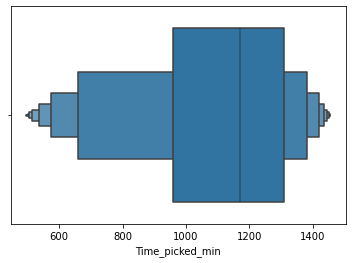

In [549]:
sns.boxenplot(x=df_train.Time_picked_min)

<AxesSubplot:xlabel='Time_Orderd_min'>

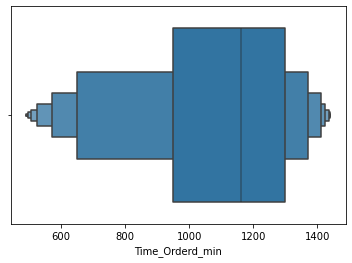

In [550]:
sns.boxenplot(x=df_train.Time_Orderd_min)

In [551]:
df_train['pickup_diff']=df_train.Time_picked_min - df_train.Time_Orderd_min
df_test['pickup_diff']=df_test.Time_picked_min - df_test.Time_Orderd_min

5.0     14703
15.0    14610
10.0    14549
Name: pickup_diff, dtype: int64
15.0    3690
10.0    3653
5.0     3612
Name: pickup_diff, dtype: int64
------------------------------
train_nan: 1731
test_nan: 444


<AxesSubplot:xlabel='pickup_diff', ylabel='count'>

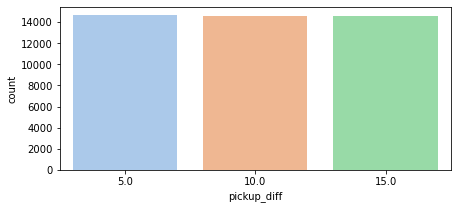

In [552]:
column_desc('pickup_diff')

fig = plt.figure(figsize = (7,3))
sns.countplot(x=df_train.pickup_diff,palette='pastel')

In [553]:
fillna_list= [5,10,15]
df_train['Time_Orderd_min']=df_train['Time_Orderd_min'].fillna(df_train.Time_picked_min - pd.Series(np.random.choice(fillna_list,size=len(df_train.index))) )
df_test['Time_Orderd_min']=df_test['Time_Orderd_min'].fillna(df_test.Time_picked_min - pd.Series(np.random.choice(fillna_list,size=len(df_test.index))) )

In [554]:
column_desc('Time_Orderd_min')

1315.0    479
1075.0    467
1340.0    466
1200.0    464
1295.0    459
         ... 
905.0       2
845.0       1
965.0       1
485.0       1
785.0       1
Name: Time_Orderd_min, Length: 195, dtype: int64
1100.0    128
1410.0    128
1360.0    124
1160.0    124
1255.0    124
         ... 
605.0       2
1450.0      1
725.0       1
1445.0      1
480.0       1
Name: Time_Orderd_min, Length: 187, dtype: int64
------------------------------
train_nan: 0
test_nan: 0


In [555]:
df_train['pickup_diff'] = df_train['pickup_diff'].fillna(df_train.Time_picked_min - df_train.Time_Orderd_min)
df_test['pickup_diff'] = df_test['pickup_diff'].fillna(df_test.Time_picked_min - df_test.Time_Orderd_min)

In [556]:
# column_desc('Order_Date')

In [557]:
day_dict = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}

df_train.Order_Date=pd.to_datetime(df_train['Order_Date']).dt.day_name().map(day_dict)
df_test.Order_Date=pd.to_datetime(df_test['Order_Date']).dt.day_name().map(day_dict)

In [558]:
column_desc('Order_Date')

3    7513
0    7190
2    7052
4    6818
6    6219
1    5401
5    5400
Name: Order_Date, dtype: int64
3    1887
0    1868
2    1766
4    1658
6    1521
5    1360
1    1339
Name: Order_Date, dtype: int64
------------------------------
train_nan: 0
test_nan: 0


In [559]:
## convert co-ordinates to distance

In [560]:
def Distance(lat1, lat2, lon1, lon2):

    lon1 = np.radians(lon1)
    lon2 = np.radians(lon2)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2

    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of earth in kilometers
    r = 6371
    return round((c * r),3)

In [561]:
df_train['distance']=Distance(df_train['Restaurant_latitude'],df_train['Delivery_location_latitude'],
                         df_train['Restaurant_longitude'],df_train['Delivery_location_longitude'])
df_test['distance']=Distance(df_test['Restaurant_latitude'],df_test['Delivery_location_latitude'],
                         df_test['Restaurant_longitude'],df_test['Delivery_location_longitude'])

<AxesSubplot:xlabel='distance'>

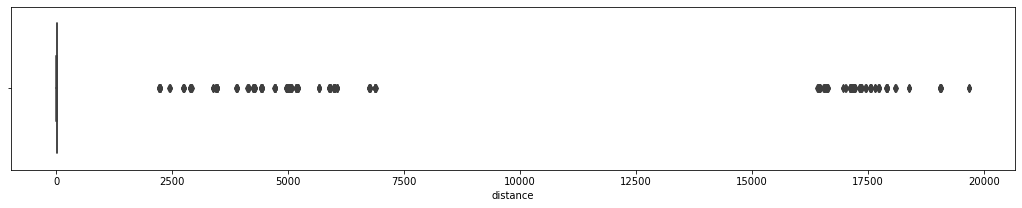

In [562]:
fig = plt.figure(figsize = (18,3))
sns.boxplot(x=df_train.distance)

In [563]:
df_train.distance[df_train['distance']>20].count()

2551

In [564]:
df_train.distance[df_train['distance']>21]

93        6048.631
284       6047.919
290      16612.239
426      17744.205
535      17118.828
           ...    
44934     4423.276
45021     4118.485
45109    16560.629
45183     5895.019
45505    17340.703
Name: distance, Length: 431, dtype: float64

In [565]:
df_test.distance[df_test['distance']>20].count()

623

In [566]:
df_test.distance[df_test['distance']>21]

58       17653.181
102      19692.296
139       6884.726
600       2458.777
613      19066.733
           ...    
11016     6753.533
11120     6873.712
11169     4258.102
11263    17182.951
11338    16430.958
Name: distance, Length: 114, dtype: float64

<AxesSubplot:xlabel='distance', ylabel='Count'>

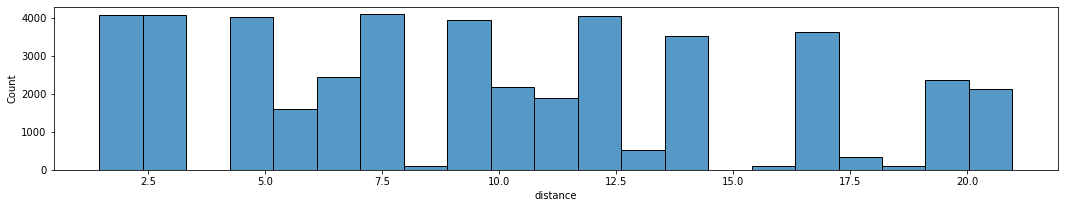

In [567]:
x=(df_train.distance[df_train['distance']<=21])
fig = plt.figure(figsize = (18,3))
sns.histplot(x=x,bins=21)

In [568]:
df_train

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Time_Orderd_min,Time_picked_min,pickup_diff,distance
1,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,5,11:30,...,1,3,0.0,0.0,1.0,24.0,690.0,705,15.0,3.025
2,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,4,19:45,...,1,2,1.0,0.0,2.0,33.0,1185.0,1190,5.0,20.184
3,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,5,8:30,...,0,3,1.0,0.0,1.0,26.0,510.0,525,15.0,1.553
4,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2,17:60,...,3,3,1.0,0.0,2.0,21.0,1080.0,1090,10.0,7.790
5,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,5,13:30,...,1,2,1.0,0.0,2.0,30.0,810.0,825,15.0,6.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45589,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,3,11:35,...,2,3,0.0,0.0,2.0,32.0,695.0,705,10.0,1.490
45590,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2,19:55,...,3,3,1.0,0.0,2.0,36.0,1195.0,1210,15.0,11.008
45591,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,3,23:50,...,0,2,0.0,0.0,2.0,16.0,1430.0,1445,15.0,4.657
45592,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,6,13:35,...,1,3,1.0,0.0,2.0,26.0,815.0,820,5.0,6.232


In [569]:
x=(df_train.distance[df_train['distance']<=21])
print('distance_mean',x.mean())
print('distance_median',x.median())

distance_mean 9.735397037332383
distance_median 9.22


<AxesSubplot:xlabel='distance', ylabel='Count'>

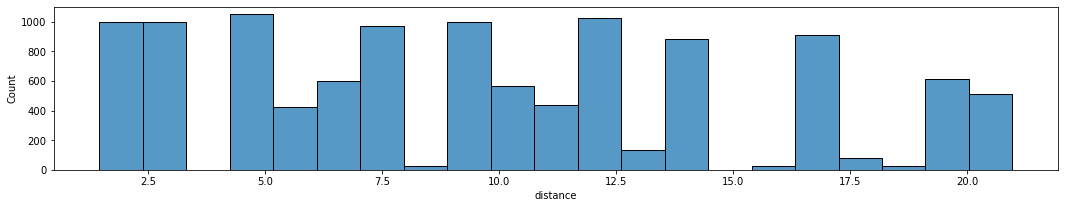

In [570]:
x=df_test.distance[df_test['distance']<=21]
fig = plt.figure(figsize = (18,3))
sns.histplot(x=x,bins=21)

In [571]:

def dist_corr(value):
    if value>21:
        return np.nan
    else:
        return value
    

df_train['distance']=df_train['distance'].map(dist_corr)
df_train['distance']=df_train['distance'].fillna(round(df_train['distance'].mean(),3))

df_test['distance']=df_test['distance'].map(dist_corr)
df_test['distance']=df_test['distance'].fillna(round(df_test['distance'].mean(),3))


<AxesSubplot:xlabel='distance'>

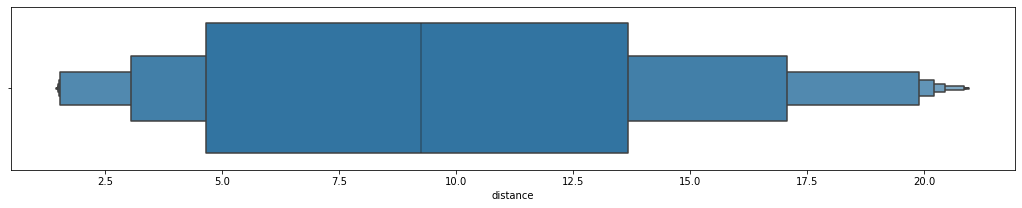

In [572]:
fig = plt.figure(figsize = (18,3))
sns.boxenplot(x=df_train.distance)

In [573]:
print(df_train.distance.isna().sum())
print(df_test.distance.isna().sum())

0
0


In [574]:
column_desc('Delivery_person_Ratings')

4.8    7148
4.7    7142
4.9    7041
4.6    6940
5.0    3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6.0      53
1.0      38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: Delivery_person_Ratings, dtype: int64
4.9    1863
4.8    1790
4.7    1723
4.6    1663
5.0     999
4.5     843
4.2     351
4.3     341
4.4     326
4.1     311
4.0     295
3.5      66
3.9      62
3.7      59
3.8      51
3.6      51
3.3      13
3.4      12
2.6      12
6.0      10
1.0       9
2.5       8
3.1       8
2.7       7
3.2       7
2.9       7
2.8       3
3.0       2
Name: Delivery_person_Ratings, dtype: int64
------------------------------
train_nan: 1908
test_nan: 507


In [575]:
fillna_list= [4.6,4.6,4.7,4.7,4.8,4.8,4.9,4.9,5.0,4.5]
df_train['Delivery_person_Ratings']=df_train['Delivery_person_Ratings'].fillna(pd.Series(np.random.choice(fillna_list,size=len(df_train.index))) )
df_test['Delivery_person_Ratings']=df_test['Delivery_person_Ratings'].fillna(pd.Series(np.random.choice(fillna_list,size=len(df_test.index))) )

In [576]:
column_desc('Delivery_person_Ratings')

4.7    7528
4.8    7508
4.9    7416
4.6    7306
5.0    4218
4.5    3502
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6.0      53
1.0      38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: Delivery_person_Ratings, dtype: int64
4.9    1957
4.8    1881
4.7    1830
4.6    1777
5.0    1044
4.5     899
4.2     351
4.3     341
4.4     326
4.1     311
4.0     295
3.5      66
3.9      62
3.7      59
3.8      51
3.6      51
3.3      13
3.4      12
2.6      12
6.0      10
1.0       9
2.5       8
3.1       8
2.7       7
3.2       7
2.9       7
2.8       3
3.0       2
Name: Delivery_person_Ratings, dtype: int64
------------------------------
train_nan: 0
test_nan: 0


35.0    2262
36.0    2260
37.0    2227
30.0    2226
38.0    2219
24.0    2210
32.0    2202
22.0    2196
29.0    2191
33.0    2187
28.0    2179
25.0    2174
34.0    2166
26.0    2159
21.0    2153
27.0    2150
39.0    2144
20.0    2136
31.0    2120
23.0    2087
50.0      53
15.0      38
Name: Delivery_person_Age, dtype: int64
30.0    579
28.0    569
33.0    556
20.0    555
38.0    551
37.0    549
21.0    549
29.0    548
35.0    547
34.0    547
32.0    545
26.0    545
24.0    544
27.0    543
23.0    541
39.0    536
31.0    535
22.0    522
36.0    521
25.0    507
50.0     10
15.0      9
Name: Delivery_person_Age, dtype: int64
------------------------------
train_nan: 1854
test_nan: 491


<AxesSubplot:xlabel='Delivery_person_Age', ylabel='count'>

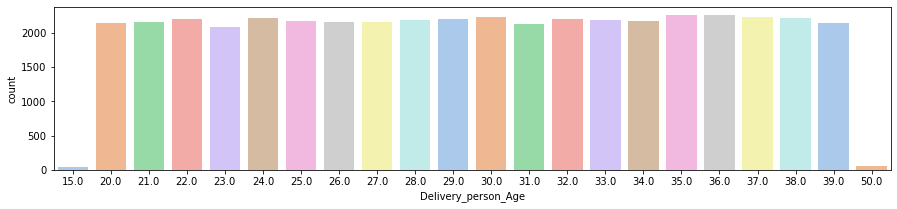

In [577]:
column_desc('Delivery_person_Age')
fig= plt.figure(figsize=[15,3])
sns.countplot(x=df_train.Delivery_person_Age, palette='pastel')

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Time_taken(min)'>

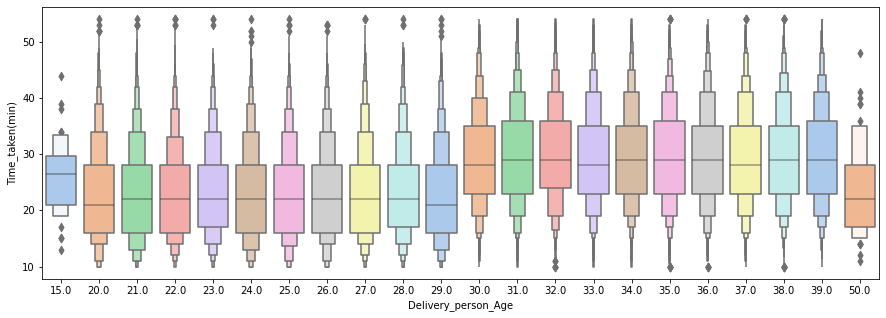

In [578]:
fig = plt.figure(figsize = (15,5))
sns.boxenplot(x=df_train.Delivery_person_Age,y=df_train['Time_taken(min)'], palette='pastel')

In [579]:
df_train.Delivery_person_Age.value_counts().index[:-2]

Float64Index([35.0, 36.0, 37.0, 30.0, 38.0, 24.0, 32.0, 22.0, 29.0, 33.0, 28.0,
              25.0, 34.0, 26.0, 21.0, 27.0, 39.0, 20.0, 31.0, 23.0],
             dtype='float64')

In [580]:
fillna_list= df_train.Delivery_person_Age.value_counts().index[:-2]
df_train['Delivery_person_Age']=df_train['Delivery_person_Age'].fillna(pd.Series(np.random.choice(fillna_list,size=len(df_train.index))) )
df_test['Delivery_person_Age']=df_test['Delivery_person_Age'].fillna(pd.Series(np.random.choice(fillna_list,size=len(df_test.index))) )

In [581]:
def age_corr(value):
    if value<20:
        return 21
    elif value>39:
        return 39
    else:
        return value
    

df_train['Delivery_person_Age']=df_train['Delivery_person_Age'].map(age_corr)
df_test['Delivery_person_Age']=df_test['Delivery_person_Age'].map(age_corr)


In [582]:
column_desc('Delivery_person_Age')

35.0    2364
36.0    2341
30.0    2320
37.0    2318
24.0    2318
22.0    2310
39.0    2310
38.0    2306
32.0    2296
29.0    2296
33.0    2287
21.0    2276
28.0    2271
25.0    2257
34.0    2250
26.0    2232
27.0    2230
20.0    2216
31.0    2215
23.0    2180
Name: Delivery_person_Age, dtype: int64
30.0    606
28.0    589
20.0    580
35.0    578
33.0    578
21.0    576
39.0    576
37.0    572
38.0    571
34.0    571
31.0    571
24.0    570
26.0    567
29.0    567
27.0    567
32.0    565
23.0    564
36.0    549
22.0    547
25.0    535
Name: Delivery_person_Age, dtype: int64
------------------------------
train_nan: 0
test_nan: 0


In [583]:
data_types_dict1 = {'Delivery_person_Age': int,  'Time_Orderd_min': int,  
                  'pickup_diff': int,  'Weather_conditions': int ,  'Road_traffic_density': int,
                   'multiple_deliveries': int,  'Festival': int ,  'City': int, 'Time_taken(min)':int }
data_types_dict2 =  {'Delivery_person_Age': int,  'Time_Orderd_min': int,  
                  'pickup_diff': int,  'Weather_conditions': int ,  'Road_traffic_density': int,
                   'multiple_deliveries': int,  'Festival': int ,  'City': int}
df_train = df_train.astype(data_types_dict1,errors='ignore')
df_test  = df_test.astype(data_types_dict2,errors='ignore')

In [584]:
results=pd.DataFrame(df_test['ID'])
results

,ID
1,0x2318
2,0x3474
3,0x9420
4,0x72ee
5,0xa759
...,...
11395,0x6909
11396,0x443b
11397,0x1ea5
11398,0x22d4


In [585]:
df_train=df_train.iloc[ : ,[2,3,8,11,12,13,14,15,16,17,18,19,20,21,22,23]]
df_test=df_test.iloc[ : ,[2,3,8,11,12,13,14,15,16,17,18,19,20,21,22]]
df_train.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Time_Orderd_min,Time_picked_min,pickup_diff,distance
1,37,4.9,5,5,2,2,1,3,0,0,1,24,690,705,15,3.025
2,34,4.5,4,1,3,2,1,2,1,0,2,33,1185,1190,5,20.184


In [586]:
df_train = df_train.reindex(columns=['Delivery_person_Age','Delivery_person_Ratings','distance','Order_Date', 'Time_Orderd_min',
                        'Time_picked_min', 'pickup_diff', 'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
                        'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
                                    'Time_taken(min)'])

df_test = df_test.reindex(columns=['Delivery_person_Age', 'Delivery_person_Ratings','distance','Order_Date', 'Time_Orderd_min',
                        'Time_picked_min', 'pickup_diff', 'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
                        'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City'])

In [589]:
df_train.head(2)

,Delivery_person_Age,Delivery_person_Ratings,distance,Order_Date,Time_Orderd_min,Time_picked_min,pickup_diff,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
1,37,4.9,3.025,5,690,705,15,5,2,2,1,3,0,0,1,24
2,34,4.5,20.184,4,1185,1190,5,1,3,2,1,2,1,0,2,33


In [591]:
df_test.head(2)

,Delivery_person_Age,Delivery_person_Ratings,distance,Order_Date,Time_Orderd_min,Time_picked_min,pickup_diff,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
1,21,4.7,6.232,2,890,905,15,1,3,3,0,1,1,0,2
2,28,4.6,17.077,1,1230,1235,5,4,3,0,1,3,1,0,2


In [592]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45593 entries, 1 to 45593
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  int32  
 1   Delivery_person_Ratings  45593 non-null  float64
 2   distance                 45593 non-null  float64
 3   Order_Date               45593 non-null  int64  
 4   Time_Orderd_min          45593 non-null  int32  
 5   Time_picked_min          45593 non-null  int64  
 6   pickup_diff              45593 non-null  int32  
 7   Weather_conditions       45593 non-null  int32  
 8   Road_traffic_density     45593 non-null  int32  
 9   Vehicle_condition        45593 non-null  int32  
 10  Type_of_order            45593 non-null  int64  
 11  Type_of_vehicle          45593 non-null  int64  
 12  multiple_deliveries      45593 non-null  int32  
 13  Festival                 45593 non-null  int32  
 14  City                  

In [593]:
df_train.isna().sum()

0
Delivery_person_Age        0
Delivery_person_Ratings    0
distance                   0
Order_Date                 0
Time_Orderd_min            0
Time_picked_min            0
pickup_diff                0
Weather_conditions         0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Time_taken(min)            0
dtype: int64

In [594]:
df_test.isna().sum()

0
Delivery_person_Age        0
Delivery_person_Ratings    0
distance                   0
Order_Date                 0
Time_Orderd_min            0
Time_picked_min            0
pickup_diff                0
Weather_conditions         0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
dtype: int64

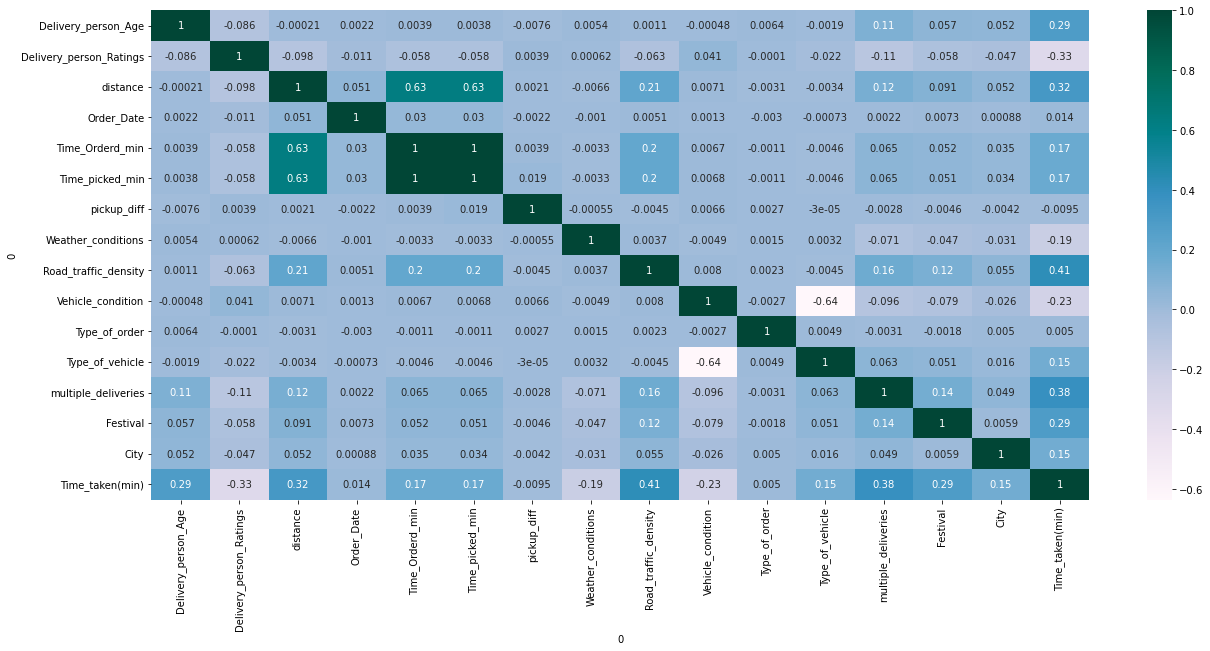

In [595]:
plt.figure(figsize=[21,9])
sns.heatmap(df_train.corr(),annot=True,cmap= 'PuBuGn')
plt.show()

## scaling, encoding and modelling  

In [596]:
train = df_train.copy()
test = df_test.copy()

In [597]:
train_x = train.iloc[: , :-1].values
train_y= train.iloc[: , -1].values
test_x= test.iloc[: , :].values

In [598]:
test_x.shape

(11399, 15)

In [599]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct= ColumnTransformer(transformers=[ ('encoder', OneHotEncoder(),[3,6,7,8,9,10,11,12,13,14]) ],remainder='passthrough')
train_x=ct.fit_transform(train_x)
test_x=ct.fit_transform(test_x)

In [601]:
test_x.shape

(11399, 46)

In [602]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.fit_transform(test_x)
test_x

array([[-0.44270987, -0.36483063,  2.33552989, ..., -0.63175281,
        -0.74492816, -0.72647115],
       [-0.44270987,  2.74099789, -0.42816836, ...,  1.31278646,
         0.50882583,  0.49011511],
       [ 2.25881571, -0.36483063, -0.42816836, ...,  0.65456575,
         0.30601269,  0.30578386],
       ...,
       [-0.44270987, -0.36483063, -0.42816836, ..., -0.11356761,
         0.61945118,  0.60071387],
       [-0.44270987, -0.36483063, -0.42816836, ...,  1.78094617,
         0.08476198,  0.06615323],
       [-0.44270987, -0.36483063, -0.42816836, ..., -0.35759877,
         0.91445212,  0.89564387]])

In [603]:
## can use small test size for hyper parameters tuning

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size=0.2,random_state=10)
len(x_test)

9119

In [ ]:
## Random forest

In [604]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
# regressor.fit(x_train,y_train)

In [605]:
from sklearn.model_selection import cross_val_score
rf_score=cross_val_score(rf_regressor,X=train_x,y=train_y,cv=5,scoring='r2')
print(rf_score)
print('k-fold cross vaidatated accuracy:',rf_score.mean())
print('standerd deviation:', rf_score.std())

[0.81625567 0.81266558 0.81572443 0.80627118 0.81291788]
k-fold cross vaidatated accuracy: 0.8127669489068243
standerd deviation: 0.003553756869926763


In [ ]:
## xgboost

In [606]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(n_estimators=1000,random_state = 0)
# xgb_model.fit(x_train,y_train)

In [607]:
from sklearn.model_selection import cross_val_score
xgb_score=cross_val_score(xgb_regressor,X=train_x,y=train_y,cv=5,scoring='r2')
print(xgb_score)
print('k-fold cross vaidatated accuracy:',xgb_score.mean())
print('standerd deviation:', xgb_score.std())

[0.78505214 0.78209165 0.78557974 0.78201167 0.78434314]
k-fold cross vaidatated accuracy: 0.7838156697865996
standerd deviation: 0.0014930300139918797


In [ ]:
## model: random forest // hyper-parameter tuning

In [620]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
params = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10]}
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state = 0)
rf_rs_model=RandomizedSearchCV(rf_regressor,param_distributions=params,scoring='r2',n_jobs=-1,cv=3,verbose=3)

In [621]:
rf_rs_model.fit(train_x,train_y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='r2', verbose=3)

In [622]:
rf_rs_model.best_score_

0.816445839592022

In [623]:
rf_rs_model.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [644]:
rf_regressor = RandomForestRegressor(n_estimators= 900, min_samples_split= 10, min_samples_leaf= 1,max_features= 'auto',
                                      max_depth= 15, random_state = 0)
print(rf_regressor)
model=rf_regressor.fit(train_x,train_y)

RandomForestRegressor(max_depth=15, min_samples_split=10, n_estimators=900,
                      random_state=0)


In [645]:
pred = model.predict(test_x)
pred

array([21.87210397, 31.61734031, 29.65746142, ..., 25.56153199,
       26.95265068, 23.73590324])

In [646]:
for index in range(len(pred)):
    pred[index]=round(pred[index])
pred

array([22., 32., 30., ..., 26., 27., 24.])

In [649]:
results['Time_taken (min)']=pred
results

,ID,Time_taken (min)
1,0x2318,22.0
2,0x3474,32.0
3,0x9420,30.0
4,0x72ee,31.0
5,0xa759,23.0
...,...,...
11395,0x6909,22.0
11396,0x443b,29.0
11397,0x1ea5,26.0
11398,0x22d4,27.0


In [650]:
results.to_csv('result.csv',index=False)

## --- THE END ---

#### miscellaneous
##### tried to tweak features a bit but no improvement in r2

In [651]:
df_train

,Delivery_person_Age,Delivery_person_Ratings,distance,Order_Date,Time_Orderd_min,Time_picked_min,pickup_diff,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
1,37,4.9,3.025,5,690,705,15,5,2,2,1,3,0,0,1,24
2,34,4.5,20.184,4,1185,1190,5,1,3,2,1,2,1,0,2,33
3,23,4.4,1.553,5,510,525,15,3,0,0,0,3,1,0,1,26
4,38,4.7,7.790,2,1080,1090,10,5,1,0,3,3,1,0,2,21
5,32,4.6,6.210,5,810,825,15,2,2,1,1,2,1,0,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45589,30,4.8,1.490,3,695,705,10,4,2,1,2,3,0,0,2,32
45590,21,4.6,11.008,2,1195,1210,15,4,3,0,3,3,1,0,2,36
45591,30,4.9,4.657,3,1430,1445,15,2,0,1,0,2,0,0,2,16
45592,20,4.7,6.232,6,815,820,5,2,2,0,1,3,1,0,2,26


In [652]:
train_1 = df_train.copy()
test_1 = df_test.copy()

In [653]:
def abc(value):
    if value<=29:
        return 0
    else:
        return 1
train_1['Delivery_person_Age']=train_1['Delivery_person_Age'].map(abc)

In [655]:
test_1['Delivery_person_Age']=test_1['Delivery_person_Age'].map(abc)

In [656]:
test_1

,Delivery_person_Age,Delivery_person_Ratings,distance,Order_Date,Time_Orderd_min,Time_picked_min,pickup_diff,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
1,0,4.7,6.232,2,890,905,15,1,3,3,0,1,1,0,2
2,0,4.6,17.077,1,1230,1235,5,4,3,0,1,3,1,0,2
3,0,4.5,13.406,0,1175,1185,10,1,3,0,0,3,1,0,2
4,0,4.8,13.414,4,1035,1040,5,0,1,1,2,2,1,0,2
5,1,4.6,17.076,6,1105,1120,15,5,1,2,0,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11395,1,4.6,16.385,6,1295,1305,10,5,3,1,1,2,1,0,2
11396,1,4.9,1.490,3,700,705,5,3,2,1,0,2,1,0,2
11397,0,4.8,9.122,3,1260,1265,5,0,0,3,0,2,1,0,2
11398,0,4.7,19.688,4,1115,1120,5,3,1,0,2,3,0,0,2


In [658]:
train_1 = train_1.drop(['Time_Orderd_min'],axis=1)
test_1=test_1.drop(['Time_Orderd_min'],axis=1)


In [659]:
train_1

,Delivery_person_Age,Delivery_person_Ratings,distance,Order_Date,Time_picked_min,pickup_diff,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
1,1,4.9,3.025,5,705,15,5,2,2,1,3,0,0,1,24
2,1,4.5,20.184,4,1190,5,1,3,2,1,2,1,0,2,33
3,0,4.4,1.553,5,525,15,3,0,0,0,3,1,0,1,26
4,1,4.7,7.790,2,1090,10,5,1,0,3,3,1,0,2,21
5,1,4.6,6.210,5,825,15,2,2,1,1,2,1,0,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45589,1,4.8,1.490,3,705,10,4,2,1,2,3,0,0,2,32
45590,0,4.6,11.008,2,1210,15,4,3,0,3,3,1,0,2,36
45591,1,4.9,4.657,3,1445,15,2,0,1,0,2,0,0,2,16
45592,0,4.7,6.232,6,820,5,2,2,0,1,3,1,0,2,26


In [660]:
train_1_x = train_1.iloc[: , :-1].values
train_1_y= train_1.iloc[: , -1].values
test_1_x= test_1.iloc[: , :].values

In [662]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45593 entries, 1 to 45593
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45593 non-null  int64  
 1   Delivery_person_Ratings  45593 non-null  float64
 2   distance                 45593 non-null  float64
 3   Order_Date               45593 non-null  int64  
 4   Time_picked_min          45593 non-null  int64  
 5   pickup_diff              45593 non-null  int32  
 6   Weather_conditions       45593 non-null  int32  
 7   Road_traffic_density     45593 non-null  int32  
 8   Vehicle_condition        45593 non-null  int32  
 9   Type_of_order            45593 non-null  int64  
 10  Type_of_vehicle          45593 non-null  int64  
 11  multiple_deliveries      45593 non-null  int32  
 12  Festival                 45593 non-null  int32  
 13  City                     45593 non-null  int32  
 14  Time_taken(min)       

In [663]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct= ColumnTransformer(transformers=[ ('encoder', OneHotEncoder(),[3,5,6,7,8,9,10,11,12,13]) ],remainder='passthrough')
train_1_x=ct.fit_transform(train_1_x)
test_1_x=ct.fit_transform(test_1_x)

In [664]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
train_1_x=sc.fit_transform(train_1_x)
test_1_x=sc.fit_transform(test_1_x)
test_x

array([[-0.44270987, -0.36483063,  2.33552989, ..., -0.63175281,
        -0.74492816, -0.72647115],
       [-0.44270987,  2.74099789, -0.42816836, ...,  1.31278646,
         0.50882583,  0.49011511],
       [ 2.25881571, -0.36483063, -0.42816836, ...,  0.65456575,
         0.30601269,  0.30578386],
       ...,
       [-0.44270987, -0.36483063, -0.42816836, ..., -0.11356761,
         0.61945118,  0.60071387],
       [-0.44270987, -0.36483063, -0.42816836, ...,  1.78094617,
         0.08476198,  0.06615323],
       [-0.44270987, -0.36483063, -0.42816836, ..., -0.35759877,
         0.91445212,  0.89564387]])

In [665]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
params = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10]}
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state = 0)
rf_rs_model=RandomizedSearchCV(rf_regressor,param_distributions=params,scoring='r2',n_jobs=-1,cv=3,verbose=3)

In [666]:
rf_rs_model.fit(train_1_x,train_1_y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='r2', verbose=3)

In [667]:
rf_rs_model.best_score_

0.8145796282112285